In [3]:
import h5py 
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import os

from numpy.polynomial.polynomial import Polynomial

# 1) Import Image

In [4]:
file_path = r'C:\Users\josep\Desktop\Summer Research Project\white_pixels.mat'

# Check if file exists
if os.path.exists(file_path):
    try:
        # load the .mat file
        mat_data = loadmat(file_path)
        print("File loaded successfully!")
    except Exception as e:
        print(f"Error loading file: {e}")
else:
    print("File does not exist.")


File loaded successfully!


In [5]:
df = mat_data['whitePixels']
df

array([[ 90,  87],
       [ 91,  87],
       [ 89,  88],
       ...,
       [ 90, 687],
       [ 88, 688],
       [ 90, 688]], dtype=uint16)

In [6]:
x = df[:,1]
x

array([ 87,  87,  88, ..., 687, 688, 688], dtype=uint16)

In [7]:
y = df[:,0]
y

array([90, 91, 89, ..., 90, 88, 90], dtype=uint16)

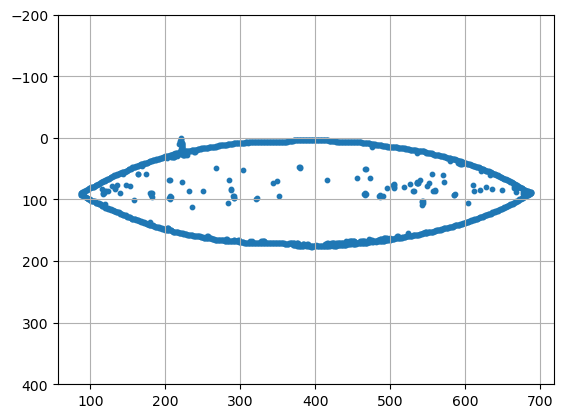

In [8]:
plt.figure()
plt.scatter(x, y, s = 10)
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(400,-200)
plt.show()

# 2) Find Centre Line

In [9]:
np.argmin(x)

0

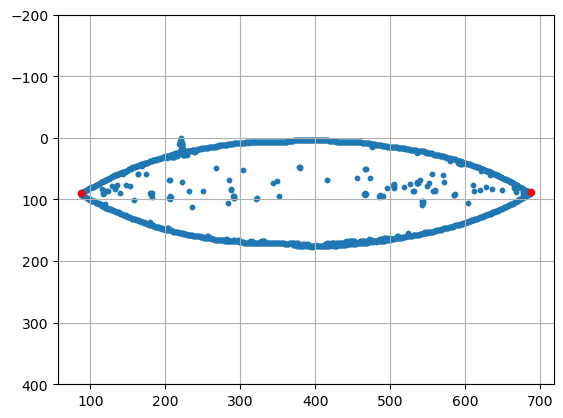

In [10]:
plt.figure()
plt.scatter(x, y, s = 10)
plt.scatter(x[np.argmin(x)], y[np.argmin(x)], s = 20, color = 'red')
plt.scatter(x[np.argmax(x)], y[np.argmax(x)], s = 20, color = 'red')
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(400,-200)
plt.show()

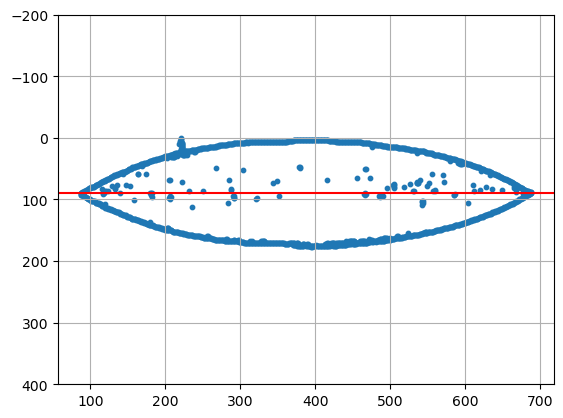

In [11]:
index_min_x = np.argmin(x)

y_at_min_x = y[index_min_x]

# Plot the scatter plot
plt.figure()
plt.scatter(x, y, s=10)
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(400, -200)

# Draw the horizontal line at y_at_min_x
plt.axhline(y=y_at_min_x, color='r', linestyle='-')

plt.show()

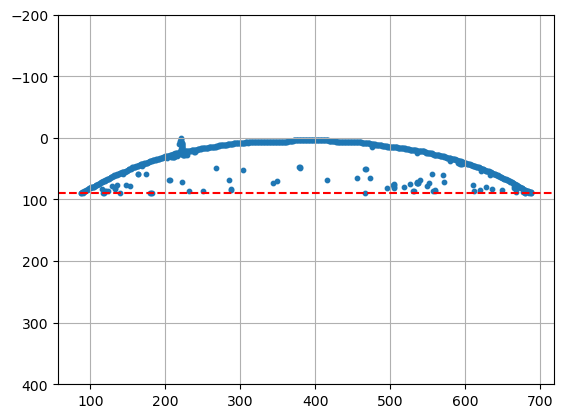

In [12]:
index_min_x = np.argmin(x)
y_at_min_x = y[index_min_x]

x_filtered = x[y <= y_at_min_x]
y_filtered = y[y <= y_at_min_x]

plt.figure()
plt.scatter(x_filtered, y_filtered, s=10)
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(400, -200)

plt.axhline(y=y_at_min_x, color='r', linestyle='--')
plt.show()

# 3) Fit curve to top of droplet

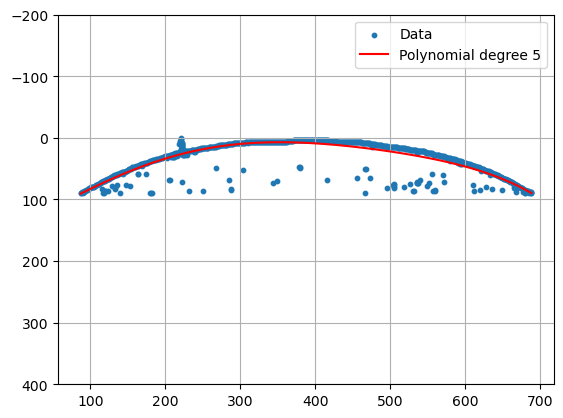

In [13]:
degree = 5
p = Polynomial.fit(x_filtered, y_filtered, degree)

# Generate x values for the fitted curve
x_fit = np.linspace(x_filtered.min(), x_filtered.max(), 100)
y_fit = p(x_fit)

# Plot the original data and the fitted curve
plt.figure()
plt.scatter(x_filtered, y_filtered, s=10, label='Data')
plt.plot(x_fit, y_fit, color='red', label=f'Polynomial degree {degree}')
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(400, -200)
plt.legend()
plt.show()

# 4) Remove Outliers & Refit

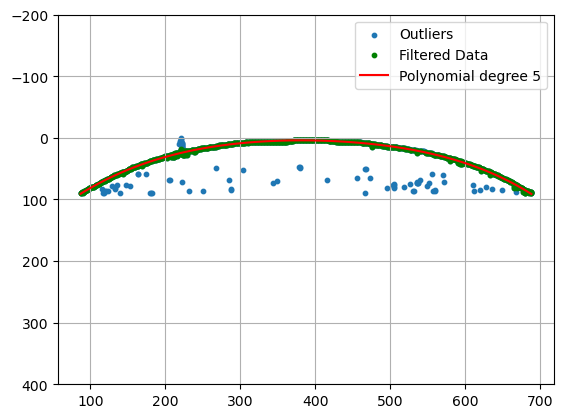

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Assuming x_filtered and y_filtered are already defined
degree = 5
p = Polynomial.fit(x_filtered, y_filtered, degree)

# Calculate the predicted y values for the filtered x data
y_pred = p(x_filtered)

# Compute the residuals
residuals = y_filtered - y_pred

# Calculate the standard deviation of the residuals
std_residuals = 0.6*np.std(residuals)

# Filter the data to include only points within one standard deviation of the fitted line
mask = np.abs(residuals) <= std_residuals
x_filtered_std = x_filtered[mask]
y_filtered_std = y_filtered[mask]

# Fit the polynomial to the filtered data
p_std = Polynomial.fit(x_filtered_std, y_filtered_std, degree)

# Generate x values for the fitted curve
x_fit = np.linspace(x_filtered_std.min(), x_filtered_std.max(), 100)
y_fit = p_std(x_fit)

# Plot the original data, filtered data, and the fitted curve
plt.figure()
plt.scatter(x_filtered, y_filtered, s=10, label='Outliers')
plt.scatter(x_filtered_std, y_filtered_std, s=10, label='Filtered Data', color = 'green')
plt.plot(x_fit, y_fit, color='red', label=f'Polynomial degree {degree}')
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(400, -200)
plt.legend()
plt.show()


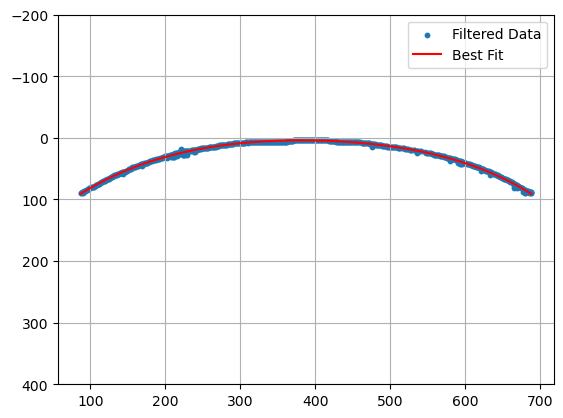

In [15]:
degree = 5
p = Polynomial.fit(x_filtered_std, y_filtered_std, degree)

# Generate x values for the fitted curve
x_fit = np.linspace(x_filtered_std.min(), x_filtered_std.max(), 100)
y_fit = p(x_fit)

# Plot the original data and the fitted curve
plt.figure()
plt.scatter(x_filtered_std, y_filtered_std, s=10, label='Filtered Data')
plt.plot(x_fit, y_fit, color='red', label="Best Fit")
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(400, -200)
plt.legend()
plt.show()

# 5) Droplet and find tangent

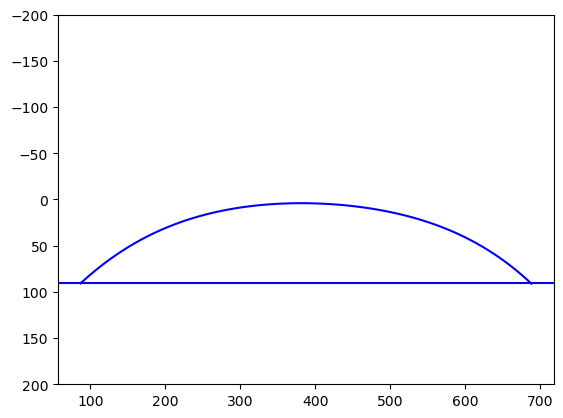

In [16]:
plt.figure()

# Fitted Curve 
plt.plot(x_fit, y_fit, color='blue')
#plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(200, -200)

# Horizontal line
index_min_x = np.argmin(x)
y_at_min_x = y[index_min_x]
plt.axhline(y=y_at_min_x, color='b', linestyle='-')

plt.show()

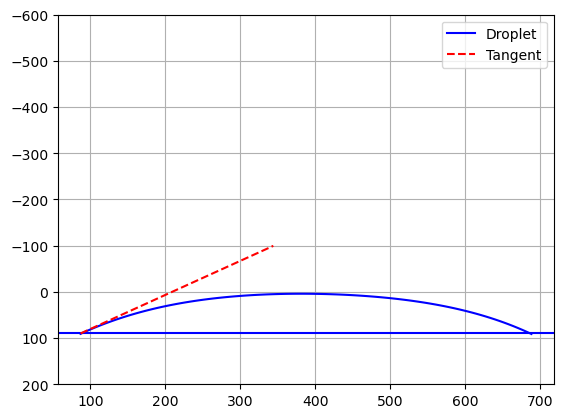

In [17]:
index_min_x = np.argmin(x_fit)
y_at_min_x = y[index_min_x]

plt.plot(x_fit, y_fit, color='blue', label = 'Droplet')
plt.axhline(y=y_at_min_x, color='b', linestyle='-')

# calculate the derivative at the point
dx = x_fit[1] - x_fit[0]
dy_dx = np.gradient(y_fit, dx)
slope_at_min_x = dy_dx[index_min_x]

# tangent line
x_tangent = np.linspace(min(x_fit), max(x_fit)/2, 100)
y_tangent = slope_at_min_x * (x_tangent - x[index_min_x]) + y_at_min_x
plt.plot(x_tangent, y_tangent, color='red', linestyle='--', label='Tangent')
plt.grid(True)

plt.legend()
plt.gca().invert_yaxis()
plt.ylim(200, -600)
plt.show()

In [18]:
angle_tangent_degrees = np.degrees(-np.arctan(slope_at_min_x))

In [19]:
angle_tangent_degrees

36.419778172523586

# Contact angle is 36.4$\degree$

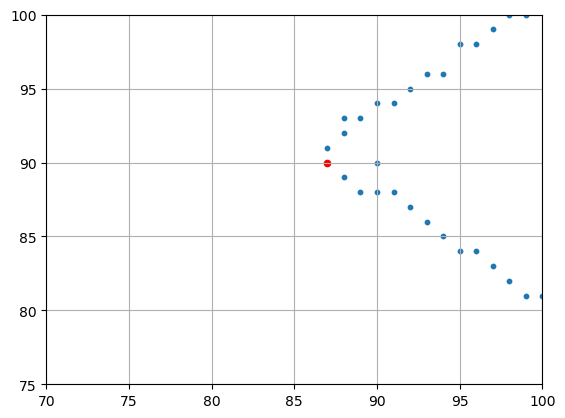

In [84]:
plt.figure()
plt.scatter(x, y, s = 10)
plt.scatter(x[0], y[0], s = 20, color = 'red')
plt.scatter(x[1474], y[1474], s = 20, color = 'red')
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(75,100)
plt.xlim(70, 100)
plt.show()

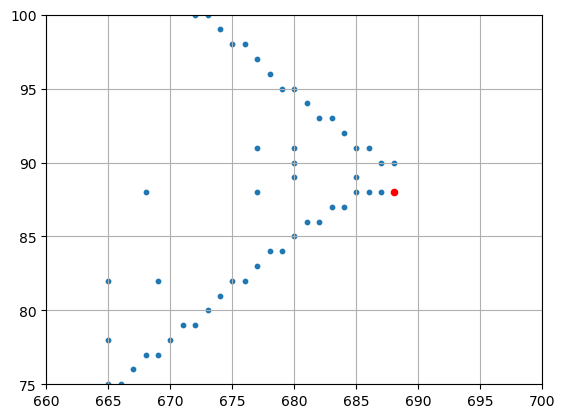

In [86]:
plt.figure()
plt.scatter(x, y, s = 10)
plt.scatter(x[0], y[0], s = 20, color = 'red')
plt.scatter(x[1474], y[1474], s = 20, color = 'red')
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(75,100)
plt.xlim(660, 700)
plt.show()

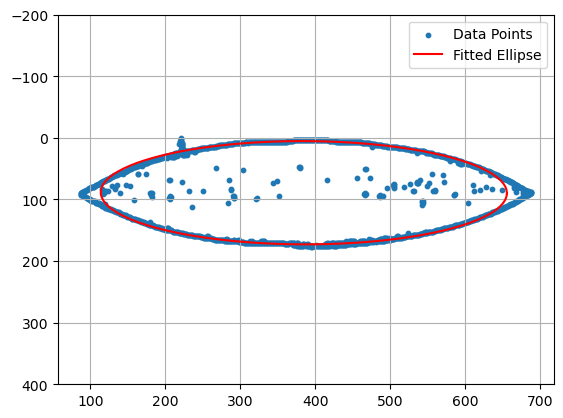

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares


# Function to fit an ellipse
def ellipse_func(params, x, y):
    xc, yc, a, b, theta = params
    cost = np.cos(theta)
    sint = np.sin(theta)
    x_rot = (x - xc) * cost + (y - yc) * sint
    y_rot = -(x - xc) * sint + (y - yc) * cost
    return (x_rot / a) ** 2 + (y_rot / b) ** 2 - 1

# Initial guess for parameters: xc, yc, a, b, theta
initial_guess = [np.mean(x), np.mean(y), np.std(x), np.std(y), 0]

# Perform least squares fitting
result = least_squares(ellipse_func, initial_guess, args=(x, y))
xc, yc, a, b, theta = result.x

# Generate points on the fitted ellipse
t = np.linspace(0, 2 * np.pi, 100)
cost = np.cos(theta)
sint = np.sin(theta)
ellipse_x = xc + a * np.cos(t) * cost - b * np.sin(t) * sint
ellipse_y = yc + a * np.cos(t) * sint + b * np.sin(t) * cost

# Plotting
plt.figure()
plt.scatter(x, y, s=10, label='Data Points')
plt.plot(ellipse_x, ellipse_y, 'r', label='Fitted Ellipse')
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(400, -200)
plt.legend()
plt.show()
